<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Wrangling Lab**


Estimated time needed: **45** minutes


In this lab, you will perform data wrangling tasks to prepare raw data for analysis. Data wrangling involves cleaning, transforming, and organizing data into a structured format suitable for analysis. This lab focuses on tasks like identifying inconsistencies, encoding categorical variables, and feature transformation.


## Objectives


After completing this lab, you will be able to:


- Identify and remove inconsistent data entries.

- Encode categorical variables for analysis.

- Handle missing values using multiple imputation strategies.

- Apply feature scaling and transformation techniques.


#### Intsall the required libraries


In [2]:
!pip install pandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 132.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 147.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 113.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 115.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 96.8 MB/s eta 0:00:00


## Tasks


#### Step 1: Import the necessary module.


### 1. Load the Dataset


<h5>1.1 Import necessary libraries and load the dataset.</h5>


Ensure the dataset is loaded correctly by displaying the first few rows.


In [3]:
# Import necessary libraries
import pandas as pd

# Load the Stack Overflow survey data
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(dataset_url)

# Display the first few rows
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


#### 2. Explore the Dataset


<h5>2.1 Summarize the dataset by displaying the column data types, counts, and missing values.</h5>


In [4]:
# Write your code here
print("Dataset Info:")
print(df.info())
print('')
print('Missing Values Summary:')
missing_summary = df.isnull().sum()
missing_summary = missing_summary[missing_summary > 0].sort_values(ascending=False)
print(missing_summary)
print('')
print('Datatypes')
print(df.dtypes)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None

Missing Values Summary:
AINextMuch less integrated    64289
AINextLess integrated         63082
AINextNo change               52939
AINextMuch more integrated    51999
EmbeddedAdmired               48704
                              ...  
YearsCode                      5568
NEWSOSites                     5151
LearnCode                      4949
EdLevel                        4653
AISelect                       4530
Length: 109, dtype: int64

Datatypes
ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float

<h5>2.2 Generate basic statistics for numerical columns.</h5>


In [5]:
# Write your code here
df.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


### 3. Identifying and Removing Inconsistencies


<h5>3.1 Identify inconsistent or irrelevant entries in specific columns (e.g., Country).</h5>


In [6]:
# Write your code here
column_name = 'Country'  # You can change this to any column name

# Display unique values and their counts
column_summary_df = df[column_name].value_counts(dropna=False).reset_index()
column_summary_df.columns = [column_name, 'Count']

# Optional: Show the percentage of each value in the column
column_summary_df['Percentage'] = round((column_summary_df['Count'] / len(df)) * 100, 2)

# Display the summary of the column
print(column_summary_df.head())

rare_entries = column_summary_df[column_summary_df['Count'] < 5]

# Display rare or potentially irrelevant values
print("Rare or potentially irrelevant entries:")
display(rare_entries)

                                             Country  Count  Percentage
0                           United States of America  11095       16.96
1                                                NaN   6507        9.94
2                                            Germany   4947        7.56
3                                              India   4231        6.47
4  United Kingdom of Great Britain and Northern I...   3224        4.93
Rare or potentially irrelevant entries:


,Country,Count,Percentage
149,Lao People's Democratic Republic,4,0.01
150,Liechtenstein,4,0.01
151,Fiji,4,0.01
152,Bahamas,4,0.01
153,Gabon,4,0.01
154,Liberia,4,0.01
155,Swaziland,4,0.01
156,Libyan Arab Jamahiriya,4,0.01
157,Burkina Faso,4,0.01
158,San Marino,3,0.00


<h5>3.2 Standardize entries in columns like Country or EdLevel by mapping inconsistent values to a consistent format.</h5>


In [7]:
## Write your code here
country_variants = df['Country'].unique()
edlevel_variants = df['EdLevel'].unique()

# Display unique values
print("Unique Countries:", country_variants)
print("Unique Education Levels:", edlevel_variants)

df = df.dropna(subset=['Country'])


df = df.dropna(subset=['EdLevel'])

Unique Countries: ['United States of America'
 'United Kingdom of Great Britain and Northern Ireland' 'Canada' 'Norway'
 'Uzbekistan' 'Serbia' 'Poland' 'Philippines' 'Bulgaria' 'Switzerland'
 'India' 'Germany' 'Ireland' 'Italy' 'Ukraine' 'Australia' 'Brazil'
 'Japan' 'Austria' 'Iran, Islamic Republic of...' 'France' 'Saudi Arabia'
 'Romania' 'Turkey' 'Nepal' 'Algeria' 'Sweden' 'Netherlands' 'Croatia'
 'Pakistan' 'Czech Republic' 'Republic of North Macedonia' 'Finland'
 'Slovakia' 'Russian Federation' 'Greece' 'Israel' 'Belgium' 'Mexico'
 'United Republic of Tanzania' 'Hungary' 'Argentina' 'Portugal'
 'Sri Lanka' 'Latvia' 'China' 'Singapore' 'Lebanon' 'Spain' 'South Africa'
 'Lithuania' 'Viet Nam' 'Dominican Republic' 'Indonesia' 'Kosovo'
 'Morocco' 'Taiwan' 'Georgia' 'San Marino' 'Tunisia' 'Bangladesh'
 'Nigeria' 'Liechtenstein' 'Denmark' 'Ecuador' 'Malaysia' 'Albania'
 'Azerbaijan' 'Chile' 'Ghana' 'Peru' 'Bolivia' 'Egypt' 'Luxembourg'
 'Montenegro' 'Cyprus' 'Paraguay' 'Kazakhstan' 'Sl

### 4. Encoding Categorical Variables


<h5>4.1 Encode the Employment column using one-hot encoding.</h5>


In [8]:
## Write your code here
df_encoded = pd.get_dummies(df, columns=['Employment'], drop_first=False)

df_encoded.head()

,ResponseId,MainBranch,Age,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,...,"Employment_Student, full-time;Not employed, but looking for work;Not employed, and not looking for work","Employment_Student, full-time;Not employed, but looking for work;Not employed, and not looking for work;Student, part-time","Employment_Student, full-time;Not employed, but looking for work;Retired","Employment_Student, full-time;Not employed, but looking for work;Student, part-time","Employment_Student, full-time;Student, part-time","Employment_Student, full-time;Student, part-time;Employed, part-time","Employment_Student, full-time;Student, part-time;Retired","Employment_Student, part-time","Employment_Student, part-time;Employed, part-time","Employment_Student, part-time;Retired"
0,1,I am a developer by profession,Under 18 years old,Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
1,2,I am a developer by profession,35-44 years old,Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,...,False,False,False,False,False,False,False,False,False,False
2,3,I am a developer by profession,45-54 years old,Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,...,False,False,False,False,False,False,False,False,False,False
3,4,I am learning to code,18-24 years old,NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,NaN,...,False,False,False,False,False,False,False,False,False,False
4,5,I am a developer by profession,18-24 years old,NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,...,False,False,False,False,False,False,False,False,False,False


### 5. Handling Missing Values


<h5>5.1 Identify columns with the highest number of missing values.</h5>


In [9]:
## Write your code here
missing_values = df.isnull().sum().reset_index()
headers = ['column','count']
missing_values.columns = headers
missing_values.sort_values(by='count', ascending=False, inplace=False).reset_index(drop=True)

,column,count
0,AINextMuch less integrated,57856
1,AINextLess integrated,56674
2,AINextNo change,46750
3,AINextMuch more integrated,45867
4,EmbeddedAdmired,42536
...,...,...
109,Age,0
110,EdLevel,0
111,Check,0
112,Employment,0


<h5>5.2 Impute missing values in numerical columns (e.g., `ConvertedCompYearly`) with the mean or median.</h5>


In [10]:
## Write your code here
numerical_columns = df.select_dtypes(include=['number']).columns

# Display the numerical columns
print(numerical_columns)
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())
missing = df[numerical_columns].isnull().sum().reset_index()
missing

Index(['ResponseId', 'CompTotal', 'WorkExp', 'JobSatPoints_1',
       'JobSatPoints_4', 'JobSatPoints_5', 'JobSatPoints_6', 'JobSatPoints_7',
       'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10',
       'JobSatPoints_11', 'ConvertedCompYearly', 'JobSat'],
      dtype='object')


,index,0
0,ResponseId,0
1,CompTotal,0
2,WorkExp,0
3,JobSatPoints_1,0
4,JobSatPoints_4,0
5,JobSatPoints_5,0
6,JobSatPoints_6,0
7,JobSatPoints_7,0
8,JobSatPoints_8,0
9,JobSatPoints_9,0


<h5>5.3 Impute missing values in categorical columns (e.g., `RemoteWork`) with the most frequent value.</h5>


In [11]:
## Write your code here
categorical_columns = df.select_dtypes(include=['object', 'category', 'bool']).columns

# Display the categorical columns
print(categorical_columns)
#most_frequent_value = df[categorical_columns].mode()[0]

df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

# Check if any missing values remain
missing_c = df[categorical_columns].isnull().sum().reset_index()
missing_c.columns = ['Column', 'MissingValues']
missing_c


Index(['MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize',
       'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse',
       'Country', 'Currency', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith',
       'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'ToolsTechAdmired',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith',
       'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use

,Column,MissingValues
0,MainBranch,0
1,Age,0
2,Employment,0
3,RemoteWork,0
4,Check,0
...,...,...
95,ProfessionalCloud,0
96,ProfessionalQuestion,0
97,Industry,0
98,SurveyLength,0


### 6. Feature Scaling and Transformation


<h5>6.1 Apply Min-Max Scaling to normalize the `ConvertedCompYearly` column.</h5>


In [12]:
## Write your code here
df['ConvertedCompYearly'] = df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].median())
min_val = df['ConvertedCompYearly'].min()
max_val = df['ConvertedCompYearly'].max()

# Apply Min-Max normalization
df['NormalizedComp'] = (df['ConvertedCompYearly'] - min_val) / (max_val - min_val)

# Show the first few rows
print(df[['ConvertedCompYearly', 'NormalizedComp']].head())

   ConvertedCompYearly  NormalizedComp
0              65000.0        0.003998
1              65000.0        0.003998
2              65000.0        0.003998
3              65000.0        0.003998
4              65000.0        0.003998


/tmp/ipykernel_300/2554430390.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['NormalizedComp'] = (df['ConvertedCompYearly'] - min_val) / (max_val - min_val)


<h5>6.2 Log-transform the ConvertedCompYearly column to reduce skewness.</h5>


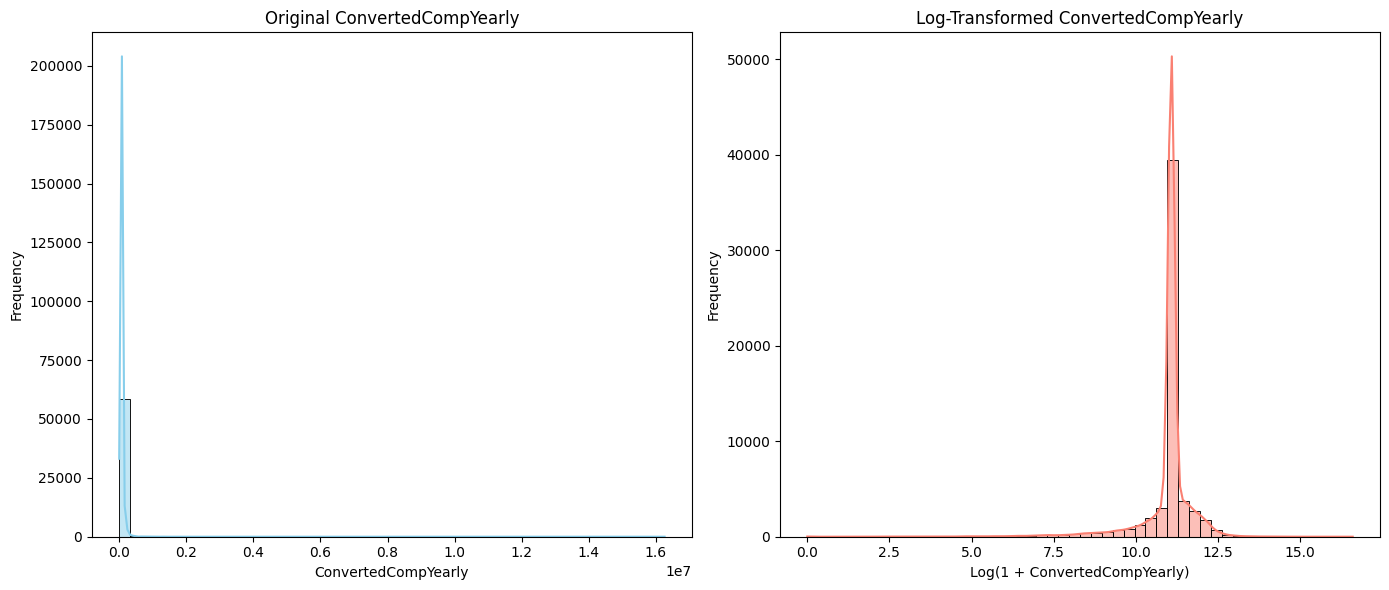

In [20]:
## Write your code here
#!pip install seaborn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df['ConvertedCompYearly'].describe()
df['ConvertedCompYearly_Log'] = np.log(df['ConvertedCompYearly'])

plt.figure(figsize=(14, 6))

# Plot original distribution
plt.subplot(1, 2, 1)
sns.histplot(df['ConvertedCompYearly'], bins=50, kde=True, color='skyblue')
plt.title("Original ConvertedCompYearly")
plt.xlabel("ConvertedCompYearly")
plt.ylabel("Frequency")

# Plot log-transformed distribution
plt.subplot(1, 2, 2)
sns.histplot(df['ConvertedCompYearly_Log'], bins=50, kde=True, color='salmon')
plt.title("Log-Transformed ConvertedCompYearly")
plt.xlabel("Log(1 + ConvertedCompYearly)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

### 7. Feature Engineering


<h5>7.1 Create a new column `ExperienceLevel` based on the `YearsCodePro` column:</h5>


In [35]:
## Write your code here
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': '0',
    'More than 50 years': '51'
})
df['YearsCodePro'] = df['YearsCodePro'].astype(int)
df['ExperienceLevel'] = df['YearsCodePro'].map(lambda x:
    'Beginner' if x <= 2 else
    'Intermediate' if x <= 5 else
    'Experienced' if x <= 10 else
    'Expert' if pd.notnull(x) else np.nan
)
df['ExperienceLevel']

/tmp/ipykernel_300/2006915071.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['ExperienceLevel'] = df['YearsCodePro'].map(lambda x:


0           Beginner
1             Expert
2             Expert
3           Beginner
4           Beginner
            ...     
65413       Beginner
65415       Beginner
65428    Experienced
65431         Expert
65435       Beginner
Name: ExperienceLevel, Length: 58930, dtype: object

### Summary


In this lab, you:

- Explored the dataset to identify inconsistencies and missing values.

- Encoded categorical variables for analysis.

- Handled missing values using imputation techniques.

- Normalized and transformed numerical data to prepare it for analysis.

- Engineered a new feature to enhance data interpretation.


Copyright © IBM Corporation. All rights reserved.
